<a href="https://colab.research.google.com/github/fulup2022/formationpublic/blob/main/Load_ML_trained_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# First we map the drive to access the data file
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
pip freeze > requirements.txt

In [2]:
import pandas as pd
dataset = pd.read_csv('/content/drive/MyDrive/DSTI/Churn/Bank churn/Bank_churn_dataset.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data_to_predict = dataset.iloc[:,3:13]
true_values = dataset.iloc[:,-1]  

In [4]:
data_to_predict

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [5]:
!pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
cd '/content/drive/MyDrive/Colab Notebooks/projet/'

/content/drive/MyDrive/Colab Notebooks/projet


In [7]:
from specific_modules import ModelWrapper, model_nn

In [8]:
import glob2
import os

my_files = glob2.glob(os.path.join('/content/drive/MyDrive/Colab Notebooks/projet/trained models basic/', '*.sav'));
my_files = my_files + glob2.glob(os.path.join('/content/drive/MyDrive/Colab Notebooks/projet/trained models smot/', '*.sav'));

print(my_files);

['/content/drive/MyDrive/Colab Notebooks/projet/trained models basic/LogisticRegression trained on basic data.sav', '/content/drive/MyDrive/Colab Notebooks/projet/trained models basic/XGBClassifier trained on basic data.sav', '/content/drive/MyDrive/Colab Notebooks/projet/trained models basic/SVM trained on basic data.sav', '/content/drive/MyDrive/Colab Notebooks/projet/trained models basic/NeuralNetwork trained on basic data.sav', '/content/drive/MyDrive/Colab Notebooks/projet/trained models basic/RandomForest trained on basic data.sav', '/content/drive/MyDrive/Colab Notebooks/projet/trained models smot/LogisticRegression trained on smot data.sav', '/content/drive/MyDrive/Colab Notebooks/projet/trained models smot/XGBClassifier trained on smot data.sav', '/content/drive/MyDrive/Colab Notebooks/projet/trained models smot/SVM trained on smot data.sav', '/content/drive/MyDrive/Colab Notebooks/projet/trained models smot/NeuralNetwork trained on smot data.sav', '/content/drive/MyDrive/Cola

In [9]:
import pickle

list_of_models =  []

for file in my_files:
  f = open(file, 'rb')
  model = pickle.load(f)
  list_of_models.append(model)

Tag = LogisticRegression trained on basic data
Confusion matrix : array([[7738,  225],
       [1684,  353]])
Precision : 0.610726643598616
Accuracy : 0.8091
Recall : 0.17329405989199803
Roc_auc_score : 0.7552151331227497
---------
Tag = XGBClassifier trained on basic data
Confusion matrix : array([[7761,  202],
       [1090,  947]])
Precision : 0.824194952132289
Accuracy : 0.8708
Recall : 0.4648993618065783
Roc_auc_score : 0.885103267560923
---------
Tag = SVM trained on basic data
Confusion matrix : array([[7858,  105],
       [1343,  694]])
Precision : 0.8685857321652065
Accuracy : 0.8552
Recall : 0.34069710358370153
Roc_auc_score : 0.8412358310844996
---------
Tag = NeuralNetwork trained on basic data
100/100 - 0s - 491ms/epoch - 5ms/step
Confusion matrix : array([[7715,  248],
       [1017, 1020]])
Precision : 0.804416403785489
Accuracy : 0.8735
Recall : 0.5007363770250368
100/100 - 0s - 131ms/epoch - 1ms/step
Roc_auc_score : 0.8878889483399258
---------
Tag = RandomForest trained 

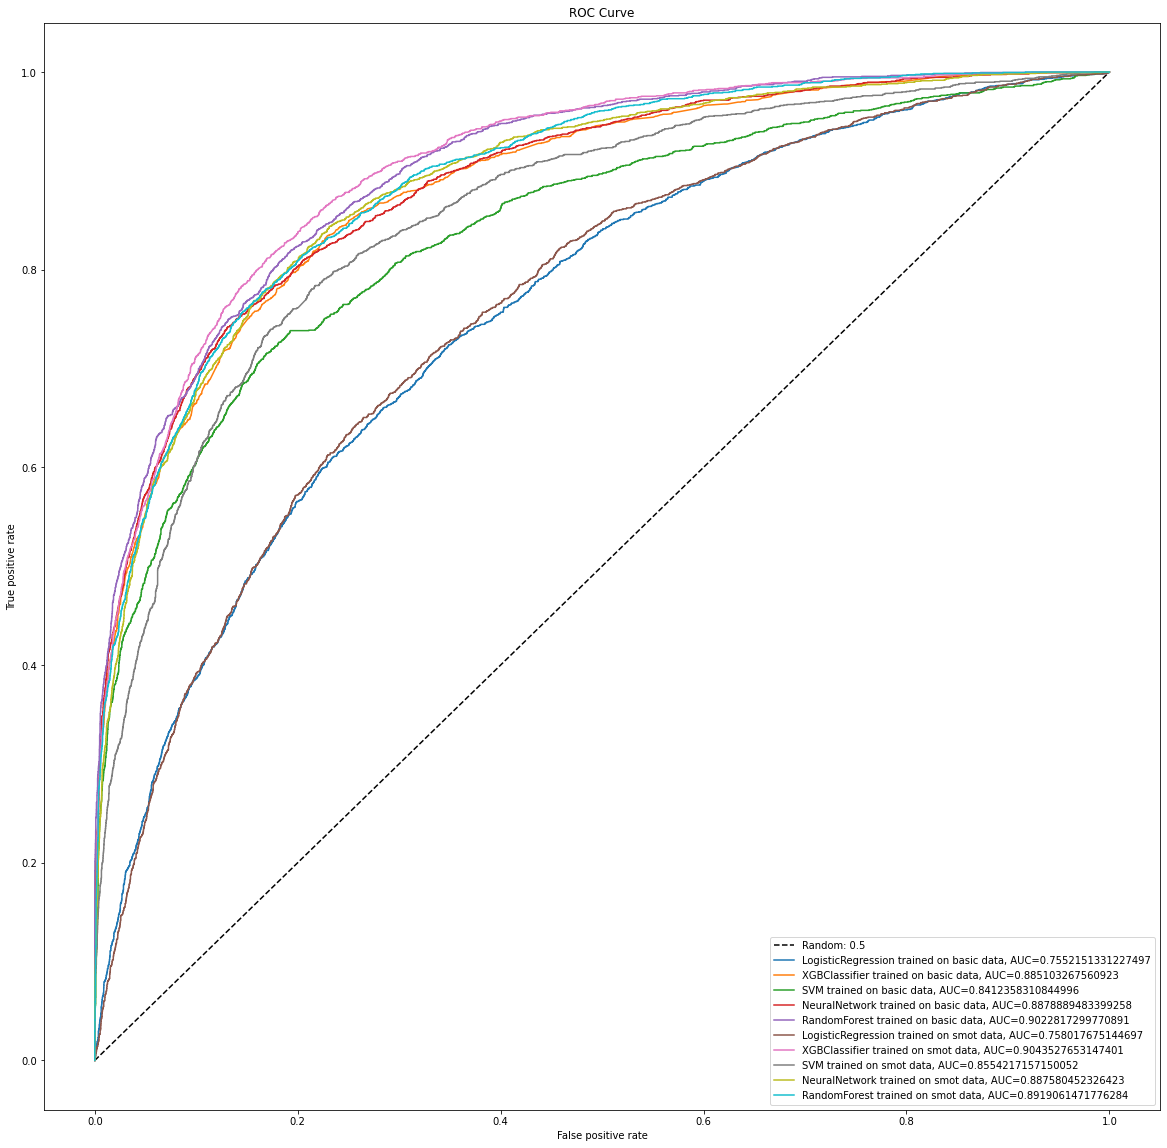

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

global_report = pd.DataFrame(columns = ['Tag', 'Description' , 'Confusion matrix', 'Accuracy', 'Precision', 'Recall', 'ROC'])

plt.figure(figsize = (20,20), linewidth= 1)
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')

for model in list_of_models:
  print('Tag = ' + str(model.tag))
  model_predictions = model.predict(data_to_predict)
  model.evaluate(y_true = true_values, y_pred = model_predictions)
  model.calculate_roc(y_true = true_values, y_score = model.predict_proba(data_to_predict)[:,1])
  global_report = global_report.append(model.get_performances(),ignore_index = True)
  plt.plot(model.fpr, model.tpr, label = str(model.tag) + ", AUC=" + str(model.roc_auc_score))
  print('---------')

plt.legend()

In [11]:
global_report

,Tag,Description,Confusion matrix,Accuracy,Precision,Recall,ROC
0,LogisticRegression trained on basic data,"GridSearchCV(cv=10, estimator=LogisticRegressi...","[[7738, 225], [1684, 353]]",0.8091,0.610727,0.173294,0.755215
1,XGBClassifier trained on basic data,"GridSearchCV(cv=5, estimator=XGBClassifier(mis...","[[7761, 202], [1090, 947]]",0.8708,0.824195,0.464899,0.885103
2,SVM trained on basic data,"GridSearchCV(cv=3, estimator=SVC(),\n ...","[[7858, 105], [1343, 694]]",0.8552,0.868586,0.340697,0.841236
3,NeuralNetwork trained on basic data,KerasClassifier(\n\tmodel=<function model_nn a...,"[[7715, 248], [1017, 1020]]",0.8735,0.804416,0.500736,0.887889
4,RandomForest trained on basic data,"GridSearchCV(cv=5, estimator=RandomForestClass...","[[7791, 172], [1051, 986]]",0.8777,0.851468,0.484045,0.902282
5,LogisticRegression trained on smot data,"GridSearchCV(cv=10, estimator=LogisticRegressi...","[[5571, 2392], [650, 1387]]",0.6958,0.367028,0.680903,0.758018
6,XGBClassifier trained on smot data,"GridSearchCV(cv=5, estimator=XGBClassifier(mis...","[[7200, 763], [602, 1435]]",0.8635,0.652866,0.704467,0.904353
7,SVM trained on smot data,"GridSearchCV(cv=3, estimator=SVC(),\n ...","[[6244, 1719], [447, 1590]]",0.7834,0.480508,0.780560,0.855422
8,NeuralNetwork trained on smot data,KerasClassifier(\n\tmodel=<function model_nn a...,"[[6677, 1286], [468, 1569]]",0.8246,0.549562,0.770250,0.887580
9,RandomForest trained on smot data,"GridSearchCV(cv=5, estimator=RandomForestClass...","[[7093, 870], [604, 1433]]",0.8526,0.622232,0.703486,0.891906


# Conclusion

The best model apparently is the XGBClassifier trained on smot data